In [116]:
import pandas as pd
import matplotlib.pyplot as plt

df_junjie = pd.read_csv('Dicom_rating_from_Junjie_csv.csv', sep=',')
df_meyers = pd.read_csv('Dicom_rating_from_Meyer_csv.csv', sep=',')

# df_junjie.drop(df_junjie[(df_junjie['Acceleration']=='AP_4')].index, inplace=True)
# df_junjie.drop(df_junjie[(df_junjie['Acceleration']=='SI_4')].index, inplace=True)
# df_junjie.drop(df_junjie[(df_junjie['Acceleration']=='4x2')].index, inplace=True)

# df_meyers.drop(df_meyers[(df_meyers['Acceleration']=='AP_4')].index, inplace=True)
# df_meyers.drop(df_meyers[(df_meyers['Acceleration']=='SI_4')].index, inplace=True)
# df_meyers.drop(df_meyers[(df_meyers['Acceleration']=='4x2')].index, inplace=True)

rating_combined = pd.concat([df_junjie, df_meyers], keys=["junjie", "meyer"])
rating_combined.head(50)

Dicom IDs Head_shape Acceleration  coil_type  Tongue  Velum  \
junjie 0          27      Large         AP_2     Airway       3      4   
       1          37      Large         AP_3     Airway       3      3   
       2          10      Large         AP_4     Airway       2      2   
       3          15      Large         SI_2     Airway       3      3   
       4           3      Large         SI_3     Airway       3      3   
       5          21      Large         SI_4     Airway       2      2   
       6           2      Large         AP_2       Head       2      2   
       7           7      Large         AP_3       Head       3      2   
       8          33      Large         AP_4       Head       2      3   
       9          30      Large         SI_2       Head       4      4   
       10         32      Large         SI_3       Head       2      4   
       11         19      Large         SI_4       Head       2      3   
       12         13      Large         AP_2  Head-neck       3      3   
       13         12      Large         AP_3  Head-neck       3      2   
       14          6      Large         AP_4  Head-neck       1      1   
       15         28      Large         SI_2  Head-neck       4      4   
       16         25      Large         SI_3  Head-neck       4      4   
       17         38      Large         SI_4  Head-neck       2      1   
       18        104      Large          2x2     Airway       3      3   
       19        130      Large          2x3     Airway       1      1   
       20        101      Large          3x2     Airway       2      2   
       21         99      Large          4x2     Airway       1      1   
       22         94      Large          2x2       Head       2      3   
       23        112      Large          2x3       Head       2      3   
       24        129      Large          3x2       Head       1      3   
       25        121      Large          4x2       Head       1      2   
       26        105      Large          2x2  Head-neck       3      4   
       27        118      Large          2x3  Head-neck       3      4   
       28        107      Large          3x2  Head-neck       1      1   
       29        109      Large          4x2  Head-neck       1      1   
       30         34     Medium         AP_2     Airway       3      4   
       31         39     Medium         AP_3     Airway       3      4   
       32         20     Medium         AP_4     Airway       3      3   
       33         23     Medium         SI_2     Airway       4      4   
       34         36     Medium         SI_3     Airway       3      4   
       35          4     Medium         SI_4     Airway       3      3   
       36         11     Medium         AP_2       Head       4      4   
       37         14     Medium         AP_3       Head       3      4   
       38          8     Medium         AP_4       Head       3      3   
       39         35     Medium         SI_2       Head       3      4   
       40          9     Medium         SI_3       Head       4      4   
       41         18     Medium         SI_4       Head       2      3   
       42         29     Medium         AP_2  Head-neck       3      3   
       43         22     Medium         AP_3  Head-neck       2      2   
       44         26     Medium         AP_4  Head-neck       1      1   
       45         17     Medium         SI_2  Head-neck       4      4   
       46         31     Medium         SI_3  Head-neck       2      1   
       47          5     Medium         SI_4  Head-neck       1      1   
       48        124     Medium          2x2     Airway       4      4   
       49        100     Medium          2x3     Airway       2      3   

           Velopharynx  Oropharynx  Hypopharynx  Trachea  Overall quality  \
junjie 0             4           4            3        4                4   
       1             3           3            2        4                3   
     

In [5]:
rating_median=rating_combined.groupby(by=["coil_type", "Acceleration"], sort= False )['Tongue','Velopharynx' ,'Oropharynx', 'Hypopharynx','Trachea', 'Overall quality'].median()

/var/folders/6t/f6jyrc5n1kq_sy6950mcdrkm0000gn/T/ipykernel_99407/2461974392.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rating_median=rating_combined.groupby(by=["coil_type", "Acceleration"], sort= False )['Tongue','Velopharynx' ,'Oropharynx', 'Hypopharynx','Trachea', 'Overall quality'].median()


In [41]:
# data_test=rating_combined[rating_combined['Acceleration']=='SI_2']

data_test=rating_combined.groupby(by=["coil_type", "Acceleration","Head_shape"], sort= False )['Tongue','Velopharynx' ,'Oropharynx', 'Hypopharynx','Trachea', 'Overall quality'].median()

data_test.reset_index()
data_test.shape

/var/folders/6t/f6jyrc5n1kq_sy6950mcdrkm0000gn/T/ipykernel_99407/1013727273.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_test=rating_combined.groupby(by=["coil_type", "Acceleration","Head_shape"], sort= False )['Tongue','Velopharynx' ,'Oropharynx', 'Hypopharynx','Trachea', 'Overall quality'].median()


(63, 6)

In [117]:
import seaborn as sns

data_test=rating_combined.melt(id_vars=['Acceleration', 'coil_type', 'Head_shape', 'Rater'], value_vars=['Tongue','Velopharynx',
                                                                                  'Oropharynx','Hypopharynx','Trachea',
                                                                                  'Overall quality'])
data_test.head(50)

,Acceleration,coil_type,Head_shape,Rater,variable,value
0,AP_2,Airway,Large,junjie,Tongue,3
1,AP_3,Airway,Large,junjie,Tongue,3
2,AP_4,Airway,Large,junjie,Tongue,2
3,SI_2,Airway,Large,junjie,Tongue,3
4,SI_3,Airway,Large,junjie,Tongue,3
5,SI_4,Airway,Large,junjie,Tongue,2
6,AP_2,Head,Large,junjie,Tongue,2
7,AP_3,Head,Large,junjie,Tongue,3
8,AP_4,Head,Large,junjie,Tongue,2
9,SI_2,Head,Large,junjie,Tongue,4


In [118]:
data_test.shape

(1080, 6)

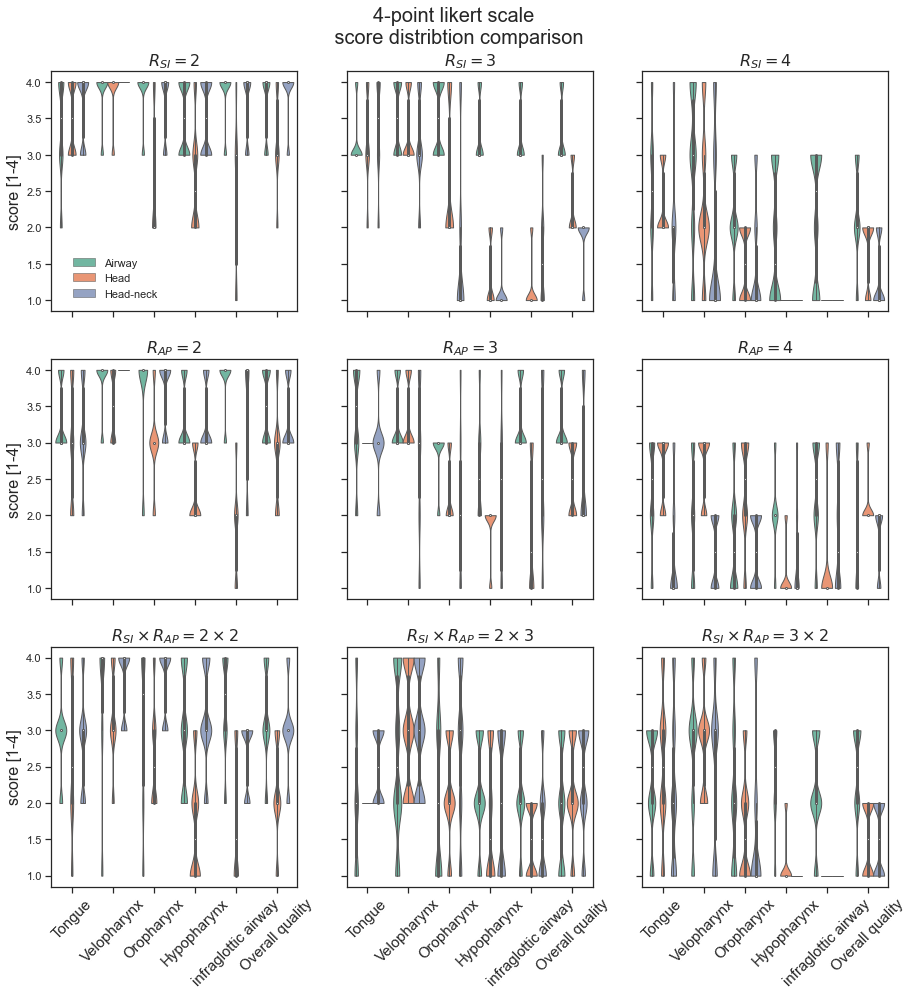

In [122]:
import seaborn as sns
# test= rating_median.reset_index()

fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True, sharex= True)

fig.suptitle('4-point likert scale \n score distribtion comparison', y=0.94,size = 20,alpha=1)

sns.set_theme(style="ticks")
sns.violinplot(ax=axes[0,0],data=data_test[(data_test['Acceleration']=='SI_2')], x='variable', y='value',hue='coil_type',
             inner='box', bw=0.2,linewidth=1, cut=0, alpha=0.01,scale='area',
             palette="Set2")

axes[0,0].set_xlabel("", size = 12,alpha=1)
axes[0,0].set_ylabel("score [1-4]", size = 16,alpha=1)
axes[0,0].set_title(r'$R_{SI}=2$', size = 16,alpha=1)
g=axes[0,0].legend(loc='lower left',bbox_to_anchor=(0.05, 0.01),frameon=False)


sns.set_theme(style="ticks")
sns.violinplot(ax=axes[0,1],data=data_test[(data_test['Acceleration']=='SI_3')], x='variable', y='value',hue='coil_type',
             inner='box', bw=0.2,linewidth=1, cut=0, alpha=0.01,scale='area',
             palette="Set2")

axes[0,1].set_xlabel("", size = 12,alpha=1)
axes[0,1].set_ylabel(" ", size = 16,alpha=1)
axes[0,1].set_title(r'$R_{SI}=3$', size = 16,alpha=1)
g=axes[0,1].legend(loc='lower left',bbox_to_anchor=(0.05, 0.01),frameon=False)
g.remove()

sns.set_theme(style="ticks")
ax=sns.violinplot(ax=axes[0,2],data=data_test[(data_test['Acceleration']=='SI_4')], x='variable', y='value',hue='coil_type',
             inner='box', bw=0.2,linewidth=1, cut=0, alpha=0.01,scale='area',
             palette="Set2")

axes[0,2].set_xlabel("", size = 12,alpha=1)
axes[0,2].set_ylabel(" ", size = 16,alpha=1)
axes[0,2].set_title(r'$R_{SI}=4$', size = 16,alpha=1)
g=axes[0,2].legend(loc='lower left',bbox_to_anchor=(0.05, 0.01),frameon=False)
g.remove()


sns.set_theme(style="ticks")
sns.violinplot(ax=axes[1,0],data=data_test[(data_test['Acceleration']=='AP_2')], x='variable', y='value',hue='coil_type',
             inner='box', bw=0.2,linewidth=1, cut=0, alpha=0.01,scale='area',
             palette="Set2")

axes[1,0].set_xlabel("", size = 12,alpha=1)
axes[1,0].set_ylabel("score [1-4]", size = 16,alpha=1)
axes[1,0].set_title(r'$R_{AP}=2$', size = 16,alpha=1)
g=axes[1,0].legend(loc='lower left',bbox_to_anchor=(0.05, 0.01),frameon=False)
g.remove()

sns.set_theme(style="ticks")
ax=sns.violinplot(ax=axes[1,1],data=data_test[(data_test['Acceleration']=='AP_3')], x='variable', y='value',hue='coil_type',
             inner='box', bw=0.2,linewidth=1, cut=0, alpha=0.01,scale='area',
             palette="Set2")

axes[1,1].set_xlabel("", size = 12,alpha=1)
axes[1,1].set_ylabel(" ", size = 16,alpha=1)
axes[1,1].set_title(r'$R_{AP}=3$', size = 16,alpha=1)
g=axes[1,1].legend(loc='lower left',bbox_to_anchor=(0.05, 0.01),frameon=False)
plt.setp(ax.get_xticklabels(), rotation=10)
g.remove()

sns.set_theme(style="ticks")
ax=sns.violinplot(ax=axes[1,2],data=data_test[(data_test['Acceleration']=='AP_4')], x='variable', y='value',hue='coil_type',
             inner='box', bw=0.2,linewidth=1, cut=0, alpha=0.01,scale='area',
             palette="Set2")

axes[1,2].set_xlabel("", size = 12,alpha=1)
axes[1,2].set_ylabel(" ", size = 16,alpha=1)
axes[1,2].set_title(r'$R_{AP}=4$', size = 16,alpha=1)
g=axes[1,2].legend(loc='lower left',bbox_to_anchor=(0.05, 0.01),frameon=False)
g.remove()
labels=['Tongue', 'Velopharynx', 'Oropharynx', 'Hypopharynx', 'infraglottic airway', 'Overall quality']

sns.set_theme(style="ticks")
ax=sns.violinplot(ax=axes[2,0],data=data_test[(data_test['Acceleration']=='2x2')], x='variable', y='value',hue='coil_type',
             inner='box', bw=0.2,linewidth=1, cut=0, alpha=0.01,scale='area',
             palette="Set2")

axes[2,0].set_xlabel("", size = 12,alpha=1)
axes[2,0].set_ylabel("score [1-4]", size = 16,alpha=1)
axes[2,0].set_title(r'$R_{SI}\times R_{AP}=2\times 2$', size = 16,alpha=1)
axes[2,0].set_xticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=15)
g=axes[2,0].legend(loc='lower left',bbox_to_anchor=(0.05, 0.01),frameon=False)
g.remove()


sns.set_theme(style="ticks")
ax=sns.violinplot(ax=axes[2,1],data=data_test[(data_test['Acceleration']=='2x3')], x='variable', y='value',hue='coil_type',
             inner='box', bw=0.2,linewidth=1, cut=0, alpha=0.01,scale='area',
             palette="Set2")

axes[2,1].set_xlabel("", size = 12,alpha=1)
axes[2,1].set_ylabel(" ", size = 16,alpha=1)
axes[2,1].set_title(r'$R_{SI}\times R_{AP}=2\times 3$', size = 16,alpha=1)
g=axes[2,1].legend(loc='lower left',bbox_to_anchor=(0.05, 0.01),frameon=False)
axes[2,1].set_xticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=15)
g.remove()

sns.set_theme(style="ticks")
ax=sns.violinplot(ax=axes[2,2],data=data_test[(data_test['Acceleration']=='3x2')], x='variable', y='value',hue='coil_type',
             inner='box', bw=0.2,linewidth=1, cut=0, alpha=0.01,scale='area',
             palette="Set2")

axes[2,2].set_xlabel("", size = 12,alpha=1)
axes[2,2].set_ylabel(" ", size = 16,alpha=1)
axes[2,2].set_title(r'$R_{SI}\times R_{AP}=3\times 2$', size = 16,alpha=1)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=15)
axes[2,2].set_xticklabels(labels)
g=axes[2,2].legend(loc='lower left',bbox_to_anchor=(0.05, 0.01),frameon=False)
g.remove()

image_format = 'png' # e.g .png, .svg, etc.
image_name = 'clubbed_along_acceleration.png'

plt.savefig(image_name, format=image_format, dpi=1200)

In [130]:
df_sidewise = pd.read_csv('sidewise_comparison_rating_csv.csv', sep=',')
df_sidewise.head(15)

,Acceleration,Coil,Tongue,Velum,Velopharynx,Oropharynx,Hypopharynx,Trachea,Overall quality,Rater
0,SI_2,Airway,4,4,4,4,4,4,4,Junjie
1,SI_3,Airway,3,1,1,2,2,3,2,Junjie
2,SI_4,Airway,2,1,1,1,1,2,1,Junjie
3,AP_2,Airway,4,4,4,3,3,4,4,Junjie
4,AP_3,Airway,3,3,3,4,4,4,3,Junjie
5,AP_4,Airway,2,1,1,1,1,2,1,Junjie
6,SI_2,Airway,3,2,4,4,4,4,4,Meyer
7,SI_3,Airway,3,2,2,2,2,3,2,Meyer
8,SI_4,Airway,2,1,1,1,1,1,1,Meyer
9,AP_2,Airway,2,2,3,3,3,3,3,Meyer


In [131]:
import seaborn as sns
df_sidewise['Rater'].replace({'Junjie':'Rater 1', 'Meyer':'Rater 2'}, inplace=True)
# df_sidewise['Acceleration'].replace({'SI_2':r'$R_{SI}=2$', 'SI_3':r'$R_{SI}=3$','SI_4':r'$R_{SI}=4$' }, inplace=True)
# df_sidewise['Acceleration'].replace({'AP_2':r'$R_{AP}=2$', 'AP_3':r'$R_{AP}=3$','AP_4':r'$R_{AP}=4$' }, inplace=True)
df_sidewise=df_sidewise.melt(id_vars=['Acceleration', 'Coil', 'Rater'], value_vars=['Tongue','Velopharynx',
                                                                                  'Oropharynx','Hypopharynx','Trachea',
                                                                                 'Overall quality'])


df_sidewise.head(50)

,Acceleration,Coil,Rater,variable,value
0,SI_2,Airway,Rater 1,Tongue,4
1,SI_3,Airway,Rater 1,Tongue,3
2,SI_4,Airway,Rater 1,Tongue,2
3,AP_2,Airway,Rater 1,Tongue,4
4,AP_3,Airway,Rater 1,Tongue,3
5,AP_4,Airway,Rater 1,Tongue,2
6,SI_2,Airway,Rater 2,Tongue,3
7,SI_3,Airway,Rater 2,Tongue,3
8,SI_4,Airway,Rater 2,Tongue,2
9,AP_2,Airway,Rater 2,Tongue,2


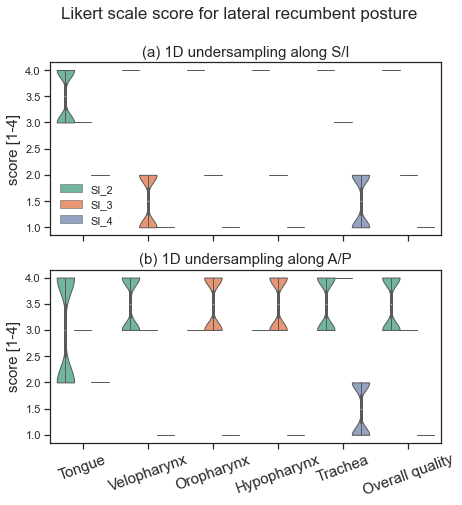

In [151]:
import seaborn as sns
# test= rating_median.reset_index()
df_SI = df_sidewise[df_sidewise['Acceleration'].isin(['SI_2', 'SI_3', 'SI_4']) ]
df_AP = df_sidewise[df_sidewise['Acceleration'].isin(['AP_2', 'AP_3', 'AP_4']) ]


fig, axes = plt.subplots(2, 1, figsize=(7, 7), sharey=True, sharex= True)
labels=['Tongue', 'Velopharynx', 'Oropharynx', 'Hypopharynx', 'infraglottic airway', 'Overall quality']

fig.suptitle('Likert scale score for lateral recumbent posture', y=0.99,size = 17,alpha=1)

sns.set_theme(style="ticks")
ax=sns.violinplot(ax=axes[0],data=df_SI, x='variable', y='value',hue='Acceleration',
             inner='box', bw=0.2,linewidth=1, cut=0, alpha=0.01,scale='area',legend=False,
             palette="Set2")

axes[0].set_xlabel("", size = 12,alpha=1)
axes[0].set_ylabel("score [1-4]", size = 15,alpha=1)
axes[0].set_title("(a) 1D undersampling along S/I", size = 15,alpha=1)
axes[0].legend(loc='lower left',bbox_to_anchor=(0.0, 0.0),frameon=False)


sns.set_theme(style="ticks")
ax=sns.violinplot(ax=axes[1],data=df_AP, x='variable', y='value',hue='Acceleration',
             inner='box', bw=0.2,linewidth=1, cut=0, alpha=0.01,scale='area',
             palette="Set2")

axes[1].set_xlabel("", size = 12,alpha=1)
axes[1].set_ylabel("score [1-4]", size = 15,alpha=1)
axes[1].set_title("(b) 1D undersampling along A/P", size = 15,alpha=1)
g=axes[1].legend(loc='lower left',bbox_to_anchor=(0.0, 0.00),frameon=False)
g.remove()
plt.setp(ax.get_xticklabels(), rotation=20, fontsize=15)





image_format = 'png' # e.g .png, .svg, etc.
image_name = 'sidewise_airway.png'

plt.savefig(image_name, format=image_format, dpi=1200)